# Customer Segmentation using RFM

The main idea of this notebook is to segregate customers of a retail store into groups based on the value they offer to the store. The metrics used to assess the value of a customer are:
- Recency (R) : How recent was the last visit of each customer
- Frequency (F) : Frequency of visit over a particular period of time
- Monetry (M) : The average bill quantity of the customer during each purchase

After segmentation, each group of customers can have personalized recommendations to reduce churn rate and increase customer revenue and satisfaction 

In [1]:
#importing necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import datetime as dt

In [2]:
df = pd.read_csv(r"C:\Users\mlvnb\Downloads\punjab.csv")

# Initial data preprocessing

In [24]:
ads_raw = df.copy()

In [25]:
ads_clean = ads_raw.iloc[:10000]
ads_clean

,location_code,mobile_no,tran_date,bill_no,item_no,bill_qty,bill_value
0,2001,9.877990e+09,2020-05-06,7766044401,100026048,1.000,95.000
1,1956,9.779075e+09,2020-04-27,4130392627,100005332,1.000,110.000
2,2090,9.501055e+09,2020-12-01,4358571939,100068234,1.000,65.000
3,3315,8.146930e+09,2020-06-03,7670045135,100115606,3.000,30.000
4,3055,7.696762e+09,2020-09-12,7229133922,100142024,1.000,37.000
...,...,...,...,...,...,...,...
9995,1663,9.872867e+09,2020-02-22,208325128,100113213,1.645,57.575
9996,3045,9.876729e+09,2020-10-08,7266135386,101864458,2.000,150.100
9997,3067,9.815439e+09,2020-03-04,7271135013,100041356,1.000,90.000
9998,3031,9.518261e+09,2020-06-11,4436262835,100121672,1.000,199.000


In [26]:
ads_clean = ads_clean.dropna(subset = ['mobile_no'])
#dropping null mobile numbers because customer loses identity without it and can't add any value to this exercise

ads_clean['tran_date'] = pd.to_datetime(ads_clean['tran_date'])
ads_clean['month'] = ads_clean['tran_date'].dt.month

ads_clean

<ipython-input-26-2a5db8226e36>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ads_clean['tran_date'] = pd.to_datetime(ads_clean['tran_date'])
<ipython-input-26-2a5db8226e36>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ads_clean['month'] = ads_clean['tran_date'].dt.month


,location_code,mobile_no,tran_date,bill_no,item_no,bill_qty,bill_value,month
0,2001,9.877990e+09,2020-05-06,7766044401,100026048,1.000,95.000,5
1,1956,9.779075e+09,2020-04-27,4130392627,100005332,1.000,110.000,4
2,2090,9.501055e+09,2020-12-01,4358571939,100068234,1.000,65.000,12
3,3315,8.146930e+09,2020-06-03,7670045135,100115606,3.000,30.000,6
4,3055,7.696762e+09,2020-09-12,7229133922,100142024,1.000,37.000,9
...,...,...,...,...,...,...,...,...
9995,1663,9.872867e+09,2020-02-22,208325128,100113213,1.645,57.575,2
9996,3045,9.876729e+09,2020-10-08,7266135386,101864458,2.000,150.100,10
9997,3067,9.815439e+09,2020-03-04,7271135013,100041356,1.000,90.000,3
9998,3031,9.518261e+09,2020-06-11,4436262835,100121672,1.000,199.000,6


In [49]:
M_score_group = pd.pivot_table(ads_clean, index=['mobile_no'], aggfunc = {'month': 'count','bill_value': np.sum})
M_score_group['TMV'] = M_score_group['bill_value']/M_score_group['month']
M_score_group.reset_index(inplace=True)

In [50]:
# today = date.today()
today_date = dt.datetime(2021,1,1) #Given according to time of execution

In [57]:
M_score_group.head()

,mobile_no,bill_value,month,TMV
0,6.005058e+09,90.00,1,90.000
1,6.005440e+09,268.43,2,134.215
2,6.005709e+09,349.00,1,349.000
3,6.006255e+09,15.00,1,15.000
4,6.121251e+09,15.00,1,15.000


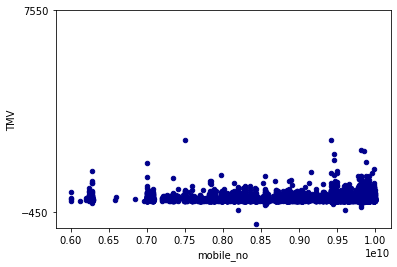

In [56]:
ax1 = M_score_group.plot.scatter(x='mobile_no',
                      y='TMV',
                      c='DarkBlue')
plt.yticks(np.arange(-450, 7600, 8000))
plt.show()

array([[<AxesSubplot:title={'center':'mobile_no'}>,
        <AxesSubplot:title={'center':'bill_value'}>],
       [<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'TMV'}>]], dtype=object)

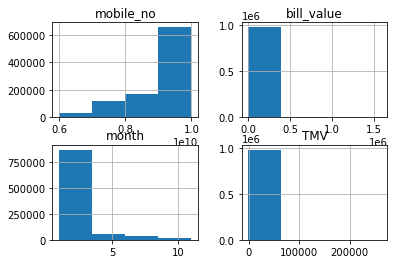

In [13]:
M_score_group.hist(bins=4)

In [14]:
F_score_group = df1.groupby(['mobile_no'],as_index=False).agg({"bill_no": "count", "month": pd.Series.nunique})

F_score_group['VMA'] = F_score_group['bill_no']/F_score_group['month']
F_score_group

,mobile_no,bill_no,month,VMA
0,6.000001e+09,5,1,5.000000
1,6.000034e+09,3,1,3.000000
2,6.000289e+09,1,1,1.000000
3,6.000432e+09,37,1,37.000000
4,6.000470e+09,26,1,26.000000
...,...,...,...,...
978508,1.000000e+10,1,1,1.000000
978509,1.000000e+10,10,2,5.000000
978510,1.000000e+10,7,1,7.000000
978511,1.000000e+10,3,3,1.000000


In [15]:
F_score_group.describe()

,mobile_no,bill_no,month,VMA
count,9.785130e+05,978513.000000,978513.000000,978513.000000
mean,9.155261e+09,17.450537,1.791700,6.350186
std,9.406914e+08,66.634001,1.778491,9.836623
min,6.000001e+09,1.000000,1.000000,1.000000
25%,8.591462e+09,1.000000,1.000000,1.000000
50%,9.575846e+09,4.000000,1.000000,3.000000
75%,9.856498e+09,12.000000,2.000000,7.500000
max,1.000000e+10,17866.000000,11.000000,1624.181818


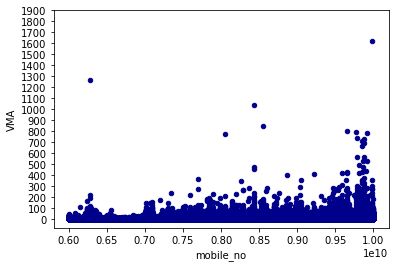

In [16]:
ax3 = F_score_group.plot.scatter(x='mobile_no',
                      y='VMA',
                      c='DarkBlue')
plt.yticks(np.arange(0,2000, 100))
plt.show()

In [17]:
F_score_group.to_csv("F_value.csv")

In [18]:
R_score_group = df1[['mobile_no','tran_date']].groupby('mobile_no')
R_score_group = R_score_group.max()
R_score_group['Rvalue'] = today_date - R_score_group['tran_date']
R_score_group1 = R_score_group.reset_index()
R_score_group1['Rvalue'] = R_score_group1['Rvalue'].dt.days.astype('int16')

In [19]:
R_score_group1
R_score_group1.describe()

,mobile_no,Rvalue
count,9.785130e+05,978513.000000
mean,9.155261e+09,128.294120
std,9.406914e+08,99.479687
min,6.000001e+09,1.000000
25%,8.591462e+09,45.000000
50%,9.575846e+09,107.000000
75%,9.856498e+09,186.000000
max,1.000000e+10,335.000000


C:\Users\Praneshraj\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Praneshraj\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rvalue', ylabel='Density'>

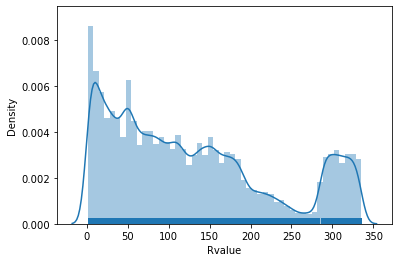

In [20]:
sns.distplot(R_score_group1.Rvalue, rug = True)

In [21]:
RFM_Values1 = R_score_group1
RFM_Values1['Fvalue'] = F_score_group['VMA']
RFM_Values1['Mvalue'] = M_score_group['TMV']
RFM_Values1 = RFM_Values1.drop(['tran_date'], axis=1)

In [22]:
def RScoring(x):
    if x <= 50:
        return 1
    elif x <= 130:
        return 2
    elif x <= 250: 
        return 3
    else:
        return 4

def FScoring(x):
    if x <= 5:
        return 1
    elif x <= 10:
        return 2
    elif x <= 15: 
        return 3
    else:
        return 4

def MScoring(x):
    if x <= 550:
        return 1
    elif x <= 1550:
        return 2
    elif x <= 2000: 
        return 3
    else:
        return 4
    


RFM_Values1['R'] =  RFM_Values1['Rvalue'].apply(lambda x : RScoring(x) )
RFM_Values1['F'] =  RFM_Values1['Fvalue'].apply(lambda x : FScoring(x) )
RFM_Values1['M'] =  RFM_Values1['Mvalue'].apply(lambda x : MScoring(x) )

In [23]:
RFM_Values1['RFM'] = RFM_Values1['R'].astype(str) + RFM_Values1['F'].astype(str)+ RFM_Values1['M'].astype(str)

In [24]:
RFM_Values1['RFM'] = RFM_Values1['RFM'].astype(int)


In [25]:
def Segment(x):
    if x <= 111:
        y = "Best Customers"
        return y
    elif x > 120 and x < 140:
        y = "Potential Loyalist"
        return y
    elif x > 140 and x < 200: 
        y = "Newbies"
        return y
    elif x > 400:
        y = "Can't Lose"
        return y
    else:
        y = "At Risk"
        return y

RFM_Values1['Segment'] =  RFM_Values1['RFM'].apply(lambda x : Segment(x) )